In [15]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from datetime import datetime as dt
from scipy import signal
from scipy.signal import correlate
from scipy import stats

plt.rcParams['figure.figsize'] = [15, 2]

In [31]:
img = cv2.imread("image 2024-01-28 09-26-37.png")

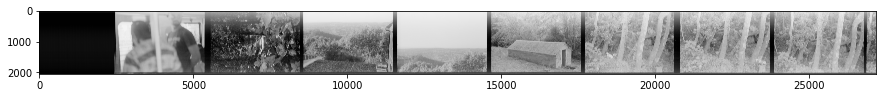

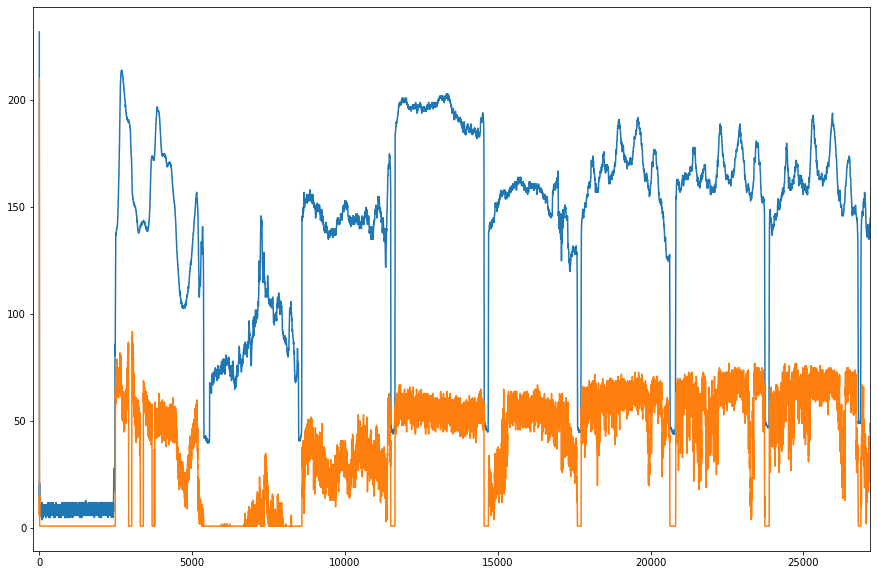

In [32]:
# Convert the image to a float type for accurate division
image = img.astype(float)

# Calculate the average of each column
# The shape of `image` is (height, width, channels), and we average over the height (axis=0)
column_averages = np.mean(image, axis=0).T[0]

# Convert the averages back to the appropriate data type (e.g., uint8 for a typical image)
column_averages = column_averages.astype(np.uint8)

min_in_rows = np.min(image, axis=0).T[0]

plt.rcParams['figure.figsize'] = [15, 10]

plt.imshow(img)
plt.show()
plt.plot(column_averages)
plt.plot(min_in_rows)
plt.xlim(-200, image.shape[1])
plt.show()

80
[2476, 5379]
[8588, 11500]
[11637, 14552]
[14691, 17603]
[17724, 20631]
[20817, 23737]
[23878, 26792]
7
(2047, 2903, 3)


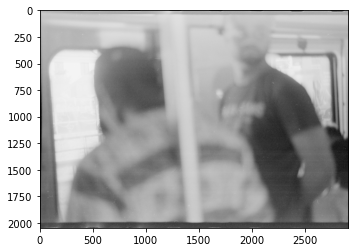

(2047, 2912, 3)


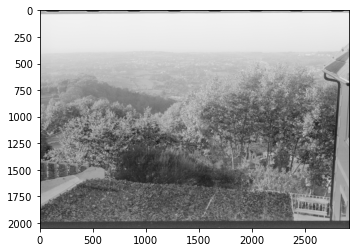

(2047, 2915, 3)


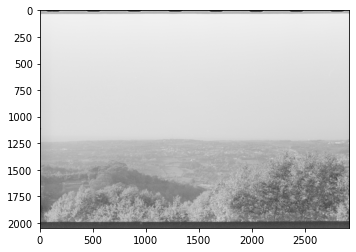

(2047, 2912, 3)


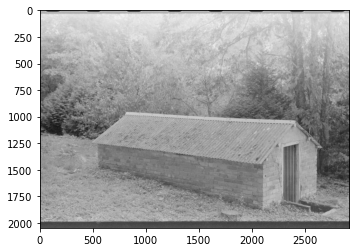

(2047, 2907, 3)


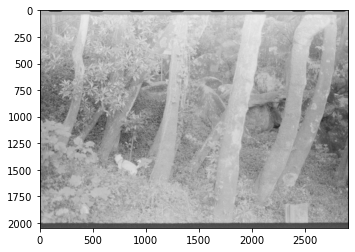

(2047, 2920, 3)


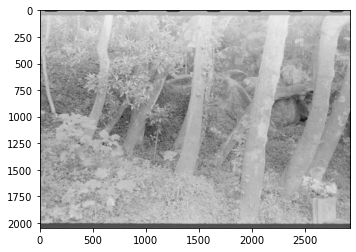

(2047, 2914, 3)


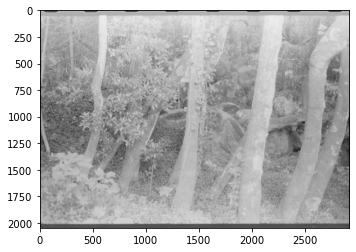

In [33]:
column_averages = np.mean(image, axis=0).T[0].astype(np.uint8)

threshold = 80#stats.mode(column_averages).mode * 3

print(threshold)

image_rot = np.transpose(image, (1, 0, 2))

detected = False

locs = []
start = 0
detected = False

for i, line in enumerate(image_rot):
    average = np.mean(line)
    # Should be data in the image
    if average > threshold:
        if not detected:
            detected = True
            start = i
    # Potential frame gap
    if average < threshold:
        if detected:
            if i - start > 2750:
                locs.append([start, i])
            detected = False
            
for loc in locs:
    print(loc)
    
print(len(locs))

plt.rcParams['figure.figsize'] = [6, 4]

for i, loc in enumerate(locs):
    x, y, width, height = loc[0], 0, loc[1] - loc[0], 2047
    roi = img[y:y+height, x:x+width]
    print(roi.shape)
    plt.imshow(roi)
    plt.show()
    #cv2.imwrite(f"{str(dt.now())} {i}.png", roi)